# Handling Imbalanced Datasets


## Introduction
Imbalanced datasets are a common issue in machine learning classification tasks. These datasets are characterized by a skewed class distribution, where one class is significantly overrepresented compared to others. This imbalance can lead to models favoring the majority class and thus providing inferior performance when predicting minority classes.

To address this issue, several strategies can be employed, including:

- Resampling techniques (oversampling minority class, undersampling majority class)
- Utilizing various assessment measures (F1-score, precision, recall)
- Implementing advanced algorithms designed for imbalanced datasets

## What is Imbalanced Data and How to Handle It?
Imbalanced data refers to datasets where the distribution of observations across the target classes is uneven. This imbalance can lead to machine learning models becoming biased in their predictions, favoring the majority class.

Resampling techniques, such as oversampling the minority class or undersampling the majority class, can be used to address this issue. Additionally, substituting accuracy with other assessment measures like precision, recall, or F1-score can provide a more accurate evaluation of model performance.

To further improve the handling of imbalanced datasets, specialized techniques such as ensemble methods and synthetic data generation can be used.

## Problems with Handling Imbalanced Data for Classification
When dealing with imbalanced data, algorithms may:

- Become biased towards the majority class, leading to predictions favoring this class
- Treat minority class observations as noise and ignore them
- Provide misleading accuracy scores due to the imbalance

Understanding and addressing these issues is crucial for developing effective machine learning models.

## Addressing Imbalanced Datasets
### Overview
Imbalanced datasets, where one class significantly outnumbers the other, are a common challenge in machine learning. They can negatively affect the model's performance. In this section, we'll explore several strategies to handle imbalanced datasets, including:
- Resampling Techniques
- Synthetic Minority Over-sampling Technique (SMOTE)
- Cost-Sensitive Learning
- Ensemble Methods
- Anomaly Detection
- One-Class Classification
- Appropriate Evaluation Metrics
- Conclusion

### Resampling Techniques

Resampling techniques are often used to address imbalanced datasets. These techniques include undersampling and oversampling.

#### Undersampling
Undersampling involves decreasing the number of instances of the majority class. This can be achieved by randomly selecting a subset of instances from the majority class or by using more advanced techniques like cluster-based undersampling or Tomek links.

#### Oversampling
Oversampling, on the other hand, involves increasing the number of instances of the minority class. This can be achieved by duplicating instances from the minority class or by using more advanced techniques like SMOTE.

#### Synthetic Minority Over-sampling Technique (SMOTE)
SMOTE is a widely used technique for oversampling imbalanced datasets. It creates synthetic instances of the minority class using a k-nearest neighbors algorithm, which can help balance the dataset and enhance the model's performance.

### Cost-Sensitive Learning
Cost-sensitive learning is a strategy for handling imbalanced datasets by assigning different costs to different types of errors. For instance, in a binary classification problem, we might assign a higher cost to false negatives than to false positives. This can help improve the model's performance on imbalanced datasets.

### Ensemble Methods
Ensemble methods are a popular strategy for handling imbalanced datasets. They work by combining the predictions of multiple models to produce a single prediction, which can help improve the model's performance on imbalanced datasets.

### Anomaly Detection
Anomaly detection is a strategy for handling imbalanced datasets by identifying instances that significantly differ from the rest of the dataset. This can help identify instances of the minority class and enhance the model's performance.

### One-Class Classification
One-class classification is a strategy for handling imbalanced datasets by training a model to recognize instances of the minority class. This can help improve the model's performance on imbalanced datasets.

### Appropriate Evaluation Metrics
When working with imbalanced datasets, it's crucial to use suitable evaluation metrics. Common evaluation metrics for imbalanced datasets include precision, recall, F1 score, and the area under the ROC curve.

### Conclusion
In this section, we've explored several strategies for handling imbalanced datasets. These strategies can help improve a model's performance on imbalanced datasets and are a crucial part of the machine learning process. I hope this information is helpful and encourages you to further explore these strategies in your work.

### References

- [Handling Imbalanced Data for Classification](https://www.geeksforgeeks.org/handling-imbalanced-data-for-classification/)
- [Imbalanced Classification Problem](https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/)
- [Handling Imbalanced Datasets in Machine Learning](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28)

# Handling Imbalanced Datasets in Python
 1. upsample minority class
 2. downsample majority class

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(123) # set seed for reproducibility 

# Create a DataFrame
n_samples = 1000 # number of samples
class_0_ratio  = 0.95 # ratio of class 0
n_class_0 = int(n_samples * class_0_ratio) # number of samples in class 0 (majority class )
n_class_1 = n_samples - n_class_0 # number of samples in class 1 (minority class)

In [3]:
n_samples , n_class_0, n_class_1  

(1000, 950, 50)

In [6]:
### Create a DataFrame with 1000 samples 

# The code is creating a DataFrame called `class_0` with 1000 samples. It generates random values for two features (`feature_1` and `feature_2`) using the `np.random.normal` function, which generates random numbers from a normal distribution. The `loc` parameter sets the mean of the distribution to 0, the `scale` parameter sets the standard deviation to 1, and the `size` parameter sets the number of samples to `n_class_0`. The `target` column is set to 0 for all samples.
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc = 0 , scale=1 , size = n_class_0) , # mean = 0 , std = 1 , size = n_class_0
    'feature_2': np.random.normal(loc=0 , scale=1 , size = n_class_0), 
    'target':[0]*n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc = 2 , scale=1 , size = n_class_1) , # mean = 2 , std = 1 , size = n_class_1
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target':[1]*n_class_1
})

In [11]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)


In [12]:
df.tail(10)

,feature_1,feature_2,target
990,2.806820,0.612010,1
991,1.527673,0.606920,1
992,2.257259,1.252027,1
993,2.183679,0.849742,1
994,0.681237,1.600021,1
995,4.142246,0.566811,1
996,2.582851,1.629890,1
997,2.984763,1.715648,1
998,1.206717,2.373888,1
999,0.764386,2.263030,1


In [14]:
df['target'].value_counts()

target
0    950
1     50
Name: count, dtype: int64

In [28]:
%pip install scikit-learn

## upsampling the minority class
from sklearn.utils import resample


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [26]:
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority,replace=True, n_samples=len(df_majority),random_state=42 )

In [27]:
df_minority_upsampled.shape

(950, 3)

In [29]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [30]:
df_upsampled['target'].value_counts()

target
0    950
1    950
Name: count, dtype: int64

<Axes: xlabel='feature_1', ylabel='feature_2'>

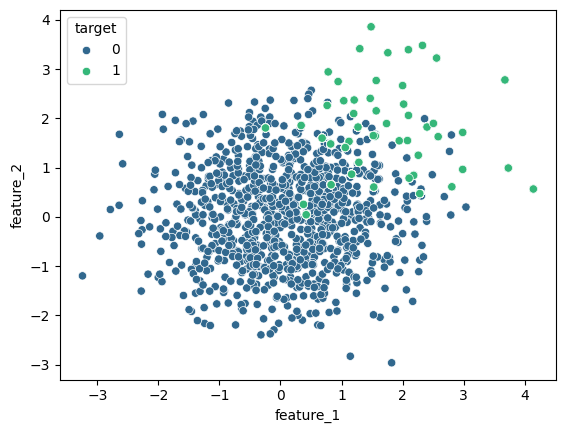

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='feature_1', y='feature_2', hue='target', data=df_upsampled , palette='viridis')



### Downsampling the majority class

In [37]:
np.random.seed(123) # set seed for reproducibility

# Create a DataFrame
n_samples = 1000 
class_0_ratio  = 0.95
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

class_0 = pd.DataFrame({
    'feature_1 ' : np.random.normal(loc=0 , scale=1 , size = n_class_0),
    'feature_2' : np.random.normal(loc=0 , scale=1 , size = n_class_0),
    'target' : [0]*n_class_0
})

class_1 = pd.DataFrame({
    'feature_1 ' : np.random.normal(loc=2 , scale=1 , size = n_class_1),
    'feature_2' : np.random.normal(loc=2 , scale=1 , size = n_class_1),
    'target' : [1]*n_class_1
})

df = pd.concat([class_0, class_1]).reset_index(drop=True)

print(df['target'].value_counts())

target
0    950
1     50
Name: count, dtype: int64


In [38]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]


In [39]:
from sklearn.utils import resample
df_majority_downsampled = resample(df_majority, replace=False, n_samples = len(df_minority), random_state=42)

In [40]:
df_majority_downsampled.shape

(50, 3)

In [41]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [42]:
df_downsampled['target'].value_counts()

target
0    50
1    50
Name: count, dtype: int64

In [50]:
sns.scatterplot(x= 'feature_1', y='feature_2', hue='target', data=df_downsampled, palette='viridis')


ValueError: Could not interpret value `feature_1` for `x`. An entry with this name does not appear in `data`.